# Your name: John Lehne
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [30]:
# import packages 
import pandas as pd
import numpy as np


# Data File Reading Section
## Write code to read in data from external sources here

In [31]:
#read datasets

data = pd.read_csv('data.csv', encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
#displaying the first few rows
data.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [33]:
# Statistical description of data
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [34]:
# Number of total rows and columns
data.shape

(435742, 13)

In [35]:
# Number of non-null values for each column
data.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [36]:
# Number of null values for each column
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [37]:
# Range, column, number of non-null objects, data type, memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [38]:
# Top 10 and bottom 10 records
print(data.head(10))
print(data.tail(10))

  stn_code       sampling_date  ... pm2_5        date
0    150.0  February - M021990  ...   NaN  1990-02-01
1    151.0  February - M021990  ...   NaN  1990-02-01
2    152.0  February - M021990  ...   NaN  1990-02-01
3    150.0     March - M031990  ...   NaN  1990-03-01
4    151.0     March - M031990  ...   NaN  1990-03-01
5    152.0     March - M031990  ...   NaN  1990-03-01
6    150.0     April - M041990  ...   NaN  1990-04-01
7    151.0     April - M041990  ...   NaN  1990-04-01
8    152.0     April - M041990  ...   NaN  1990-04-01
9    151.0       May - M051990  ...   NaN  1990-05-01

[10 rows x 13 columns]
       stn_code sampling_date  ... pm2_5        date
435732     SAMP      09-12-15  ...   NaN  2015-12-09
435733     SAMP      12-12-15  ...   NaN  2015-12-12
435734     SAMP      15-12-15  ...   NaN  2015-12-15
435735     SAMP      18-12-15  ...   NaN  2015-12-18
435736     SAMP      21-12-15  ...   NaN  2015-12-21
435737     SAMP      24-12-15  ...   NaN  2015-12-24
435738     

## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [39]:
# Cleaning up the data

#dropping columns that aren't required

data.drop(columns = ['stn_code','agency','sampling_date','location_monitoring_station'], inplace = True)

# dropping rows where no date is available

data.dropna(subset = ['date'], inplace = True)

data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [40]:
# displaying final columns (data.columns)

data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [41]:
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO",
         "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", 
         "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }

data.type = data.type.replace(types)


In [42]:
# Display top 10 records after codification of 'types'
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [43]:
#Checking original data types
data.dtypes
#Changing date data type to datetime
data.date = pd.to_datetime(data.date)
#Checking new data type
data.dtypes
#Creating year column that extracts year from the date column
data['year'] = pd.DatetimeIndex(data.date).year

data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01,1990
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01,1990
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01,1990
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01,1990
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [44]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

#Defined columns of importance 
Cols = data[['so2','no2','rspm','spm','pm2_5']]

#Used SimpleImputer to fill missing values using 'mean' as the strategy
from sklearn.impute import  SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
newCols = pd.DataFrame(imputer.fit_transform(Cols))
newCols.columns = Cols.columns

data.loc[:,['so2','no2','rspm','spm','pm2_5']] = newCols[['so2','no2','rspm','spm','pm2_5']]

#Display data.info
print(data.info())

#Display that there are no more missing values in the dataset
print(data.isnull().sum())

## For some reason the final 4 rows are still null. I am uncertain why...
print(data[data['so2'].isnull()])

## Dropped 4 records for West Bengal that were still null
data.dropna(inplace = True)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       435731 non-null  float64       
 4   no2       435731 non-null  float64       
 5   rspm      435731 non-null  float64       
 6   spm       435731 non-null  float64       
 7   pm2_5     435731 non-null  float64       
 8   date      435735 non-null  datetime64[ns]
 9   year      435735 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB
None
so2       34643
no2       16230
rspm      40219
spm      237380
pm2_5    426421
dtype: int64
state       0
location    0
type        0
so2         4
no2         4
rspm        4
spm         4
pm2_5       4
date        0
year        0
dtype

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

In [45]:
import matplotlib.pyplot as plt

### so2 status

                            so2
state                          
Nagaland               2.000000
Mizoram                2.000000
Meghalaya              2.000000
Arunachal Pradesh      2.500000
Himachal Pradesh       3.000000
Kerala                 4.200000
Telangana              5.000000
Odisha                 5.000000
Jammu & Kashmir        5.000000
Andhra Pradesh         5.000000
Goa                    6.000000
Rajasthan              6.300000
Delhi                  6.300000
Assam                  6.500000
Puducherry             7.300000
Daman & Diu            7.600000
Chandigarh             7.950000
West Bengal            8.000000
Dadra & Nagar Haveli   8.400000
Karnataka             10.000000
Uttar Pradesh         10.000000
Tamil Nadu            10.000000
Punjab                10.300000
Manipur               10.829428
Bihar                 10.829428
Haryana               10.829428
Madhya Pradesh        10.829428
Chhattisgarh          12.500000
Maharashtra           13.000000
Gujarat 

<function matplotlib.pyplot.show>

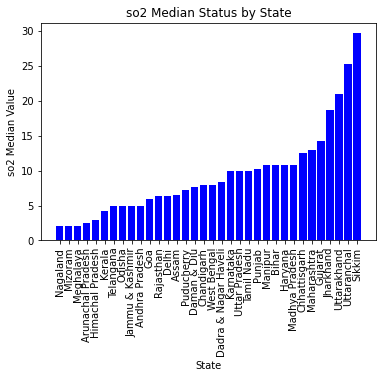

In [46]:
so2_state = data.groupby('state').agg({'so2':'median'}).sort_values('so2', ascending = True)
print(so2_state)

plt.bar(so2_state.index,so2_state.so2, color = 'b')
plt.title('so2 Median Status by State')
plt.ylabel('so2 Median Value')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.show

### no2 status

                            no2
state                          
Sikkim                 1.100000
Arunachal Pradesh      5.000000
Mizoram                5.000000
Nagaland               7.000000
Meghalaya             10.000000
Goa                   11.600000
Puducherry            13.000000
Jammu & Kashmir       13.000000
Himachal Pradesh      13.900000
Kerala                14.000000
Assam                 14.000000
Odisha                16.000000
Daman & Diu           17.600000
Dadra & Nagar Haveli  18.000000
Chandigarh            18.000000
Madhya Pradesh        19.200000
Manipur               19.850000
Andhra Pradesh        20.000000
Tamil Nadu            21.000000
Karnataka             21.200000
Chhattisgarh          21.500000
Telangana             22.000000
Haryana               22.750000
Gujarat               23.000000
Uttarakhand           25.809659
Rajasthan             26.000000
Uttar Pradesh         27.000000
Uttaranchal           27.700000
Punjab                28.300000
Maharash

<function matplotlib.pyplot.show>

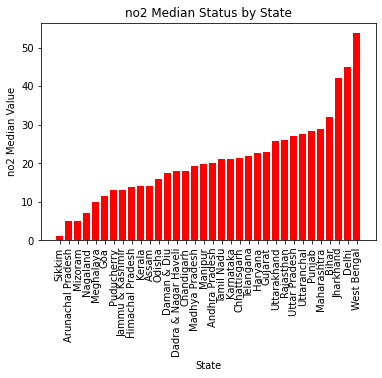

In [47]:
no2_state = data.groupby('state').agg({'no2':'median'}).sort_values('no2', ascending = True)
print(no2_state)

plt.bar(no2_state.index,no2_state.no2, color = 'r')
plt.title('no2 Median Status by State')
plt.ylabel('no2 Median Value')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.show

### rspm status

                            rspm
state                           
Mizoram                40.000000
Puducherry             46.000000
Kerala                 49.000000
Goa                    56.000000
Meghalaya              57.000000
Tamil Nadu             59.000000
Manipur                61.000000
Karnataka              63.000000
Arunachal Pradesh      74.500000
Andhra Pradesh         76.000000
Assam                  77.000000
Nagaland               78.000000
Telangana              80.000000
Odisha                 81.000000
Chandigarh             90.000000
Himachal Pradesh       90.000000
Dadra & Nagar Haveli   91.000000
Gujarat                95.000000
Maharashtra            96.000000
West Bengal            96.000000
Chhattisgarh          108.833091
Daman & Diu           108.833091
Bihar                 108.833091
Sikkim                108.833091
Madhya Pradesh        108.833091
Uttaranchal           111.000000
Rajasthan             112.000000
Jammu & Kashmir       116.000000
Uttarakhan

<function matplotlib.pyplot.show>

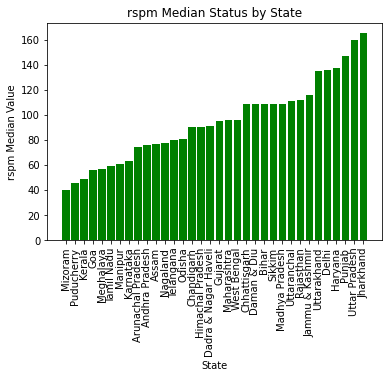

In [48]:
rspm_state = data.groupby('state').agg({'rspm':'median'}).sort_values('rspm', ascending = True)
print(rspm_state)

plt.bar(rspm_state.index,rspm_state.rspm, color = 'g')
plt.title('rspm Median Status by State')
plt.ylabel('rspm Median Value')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.show

### spm status

                            spm
state                          
Manipur               119.00000
Puducherry            196.00000
Goa                   199.00000
Daman & Diu           200.50000
Sikkim                213.00000
Andhra Pradesh        220.78348
Meghalaya             220.78348
Mizoram               220.78348
Nagaland              220.78348
Odisha                220.78348
Punjab                220.78348
Tamil Nadu            220.78348
Telangana             220.78348
Uttar Pradesh         220.78348
Uttarakhand           220.78348
Rajasthan             220.78348
Maharashtra           220.78348
Kerala                220.78348
Karnataka             220.78348
Jharkhand             220.78348
Jammu & Kashmir       220.78348
Himachal Pradesh      220.78348
Haryana               220.78348
Gujarat               220.78348
Dadra & Nagar Haveli  220.78348
Chhattisgarh          220.78348
Chandigarh            220.78348
Bihar                 220.78348
Assam                 220.78348
Arunacha

<function matplotlib.pyplot.show>

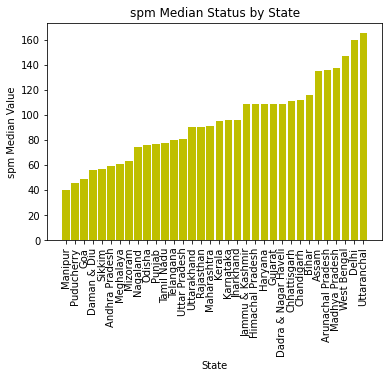

In [49]:
spm_state = data.groupby('state').agg({'spm':'median'}).sort_values('spm', ascending = True)
print(spm_state)

plt.bar(spm_state.index,rspm_state.rspm, color = 'y')
plt.title('spm Median Status by State')
plt.ylabel('spm Median Value')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.show

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [50]:
# Create new df containing important variables for 'Andhra Pradesh'
AP_data = data.loc[data.state == 'Andhra Pradesh', ['state','no2','so2','rspm','spm','year']]

#grouping by year
AP_year = AP_data.groupby('year').sum().sort_values('year', ascending = True)

#Displaying top 5 records
AP_year.head(5)

,no2,so2,rspm,spm
year,,,,
1990,443.600000,257.200000,3156.159638,4798.618276
1991,677.800000,389.200000,3917.991274,5560.783480
1992,3133.119318,1719.658855,9468.478913,18326.000000
1993,574.600000,307.600000,3917.991274,7948.205266
1994,1151.200000,677.900000,6856.484730,11211.854827


<function matplotlib.pyplot.show>

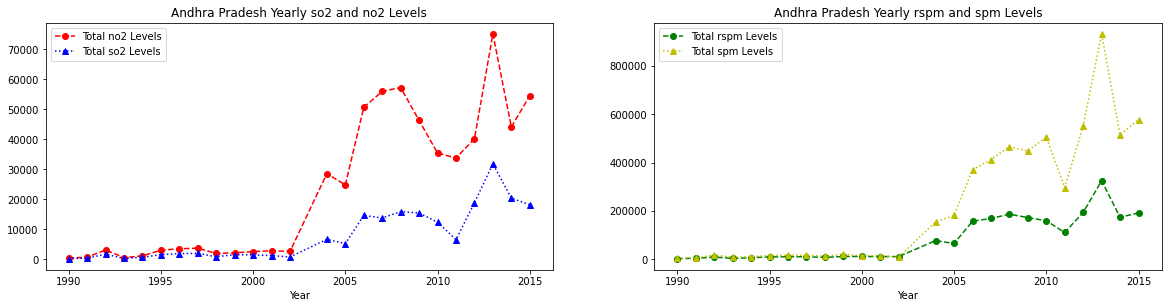

In [51]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.
plt.figure(figsize = (20,10))
plt.subplot(221)
plt.plot(AP_year['no2'], linestyle = 'dashed', marker = 'o', color = 'r', label = 'Total no2 Levels')
plt.plot(AP_year['so2'], linestyle = 'dotted', marker = '^', color = 'b', label = 'Total so2 Levels')
plt.title('Andhra Pradesh Yearly so2 and no2 Levels')
plt.xlabel('Year')
plt.legend()
plt.show

plt.subplot(222)
plt.plot(AP_year['rspm'], linestyle = 'dashed', marker = 'o', color = 'g', label = 'Total rspm Levels')
plt.plot(AP_year['spm'], linestyle = 'dotted', marker = '^', color ='y', label = 'Total spm Levels')
plt.title('Andhra Pradesh Yearly rspm and spm Levels')
plt.xlabel('Year')
plt.legend()
plt.show

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



The most alarming factor is the dramatic spike in polution after the year 2003.  so2 and spm rise at an extreme rate and should be looked into further.  Perhaps the population grew and that is why there is more pollution, but regardless of the reason the rapid rise is alarming for the city of Andrha Pradesh and changes should be explored in order to lower these levels.